# 15 · Detecta bordes 

Uso de **Sobel**, **Laplaciano** y **Canny** sobre una imagen **en escala de grises** 


## 1) Fundamentos (resumen)

### Gradiente
Para una imagen \(I(x,y)\), el **gradiente** es
$$
\nabla I = \begin{bmatrix} I_x \\ I_y \end{bmatrix},
\quad
|\nabla I| = \sqrt{I_x^2 + I_y^2}.
$$

### Sobel
Aproxima derivadas \(I_x, I_y\) con máscaras y un ligero suavizado:
\[
G_x = \begin{bmatrix} -1&0&1\\-2&0&2\\-1&0&1 \end{bmatrix}, \quad
G_y = \begin{bmatrix} -1&-2&-1\\0&0&0\\1&2&1 \end{bmatrix}.
\]

### Laplaciano
Segunda derivada (isótropa):
\[
\nabla^2 I \approx \begin{bmatrix} 0&1&0\\1&-4&1\\0&1&0 \end{bmatrix}
\ \text{o}\
\begin{bmatrix} 1&1&1\\1&-8&1\\1&1&1 \end{bmatrix}.
\]

### Canny (pipeline)
1. Suavizado Gaussiano.  
2. Gradiente (Sobel).  
3. **Supresión de no-máximos**.  
4. **Histeresis** con dos umbrales (bajo, alto).


## 2) Carga de imagen y conversión a grises

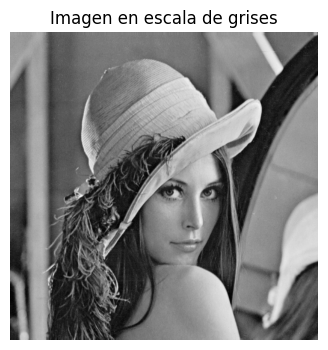

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

# Ruta (ajústala a tu estructura)
IMG_PATH = r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png"

img_bgr = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)
if img_bgr is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen en {IMG_PATH}")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(4,4))
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()

## 3) Sobel: derivadas, magnitud y dirección

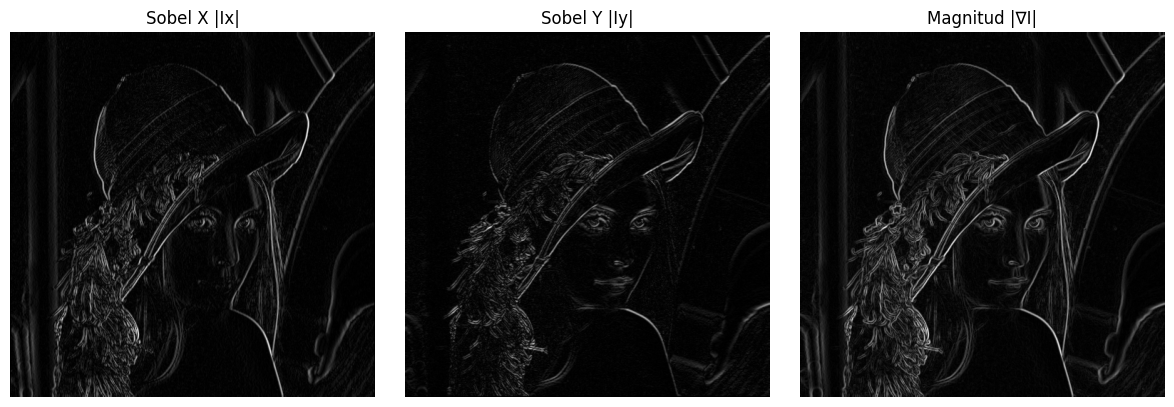

In [2]:
# Derivadas Sobel (usamos CV_64F para evitar saturación)
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  # Ix
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  # Iy

mag = np.hypot(sobelx, sobely)
mag = (mag / mag.max() * 255).astype(np.uint8)

angle = np.rad2deg(np.arctan2(sobely, sobelx))  # dirección del borde (-180, 180]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(np.abs(sobelx), cmap='gray'); plt.title("Sobel X |Ix|"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(np.abs(sobely), cmap='gray'); plt.title("Sobel Y |Iy|"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(mag, cmap='gray');            plt.title("Magnitud |∇I|"); plt.axis("off")
plt.tight_layout(); plt.show()

## 4) Laplaciano

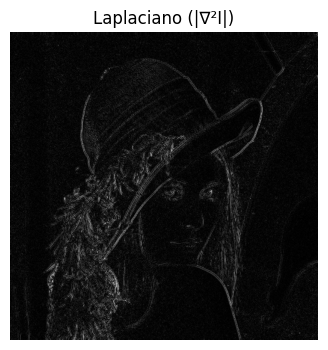

In [3]:
lap = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)
lap_show = np.clip(np.abs(lap) / lap.max() * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(lap_show, cmap='gray')
plt.title("Laplaciano (|∇²I|)")
plt.axis("off")
plt.show()

## 5) Canny

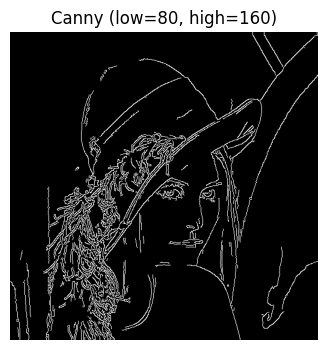

In [4]:
# Umbrales: puedes ajustarlos según contraste/ruido
low, high = 80, 160
edges_canny = cv2.Canny(img_gray, threshold1=low, threshold2=high, L2gradient=True)

plt.figure(figsize=(4,4))
plt.imshow(edges_canny, cmap='gray')
plt.title(f"Canny (low={low}, high={high})")
plt.axis("off")
plt.show()

## 6) Comparación 

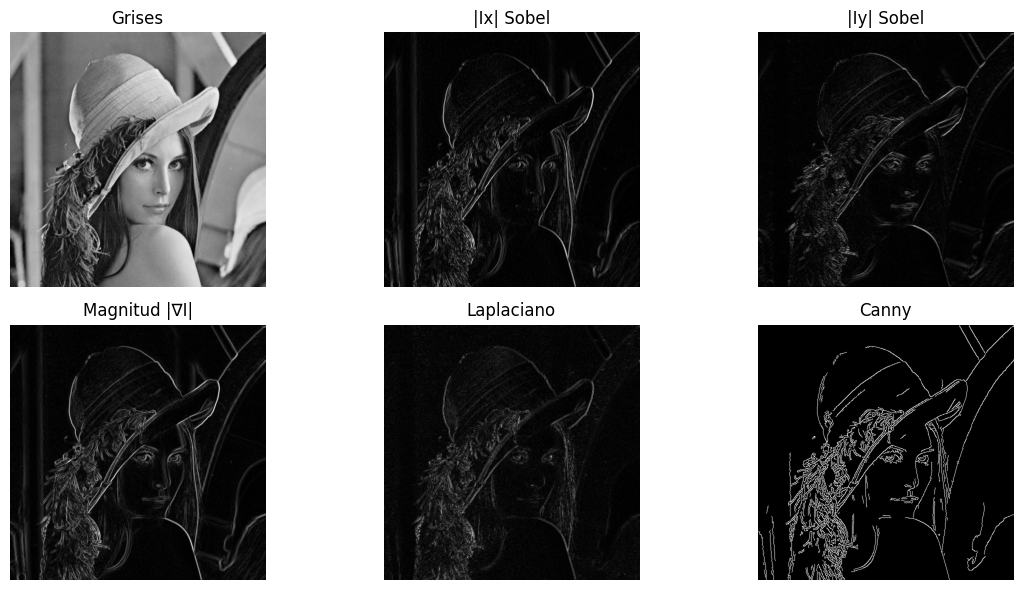

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1); plt.imshow(img_gray, cmap='gray');  plt.title("Grises");          plt.axis("off")
plt.subplot(2,3,2); plt.imshow(np.abs(sobelx), cmap='gray'); plt.title("|Ix| Sobel"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(np.abs(sobely), cmap='gray'); plt.title("|Iy| Sobel"); plt.axis("off")

plt.subplot(2,3,4); plt.imshow(mag, cmap='gray');       plt.title("Magnitud |∇I|");  plt.axis("off")
plt.subplot(2,3,5); plt.imshow(lap_show, cmap='gray');  plt.title("Laplaciano");     plt.axis("off")
plt.subplot(2,3,6); plt.imshow(edges_canny, cmap='gray'); plt.title("Canny");        plt.axis("off")
plt.tight_layout(); plt.show()

## 7) Indicadores simples, conteo de pixeles...

In [6]:
# Binarizamos magnitud sobel y laplaciano para conteo (umbral simple por percentil)
p_sobel = np.percentile(mag, 85)
p_lap   = np.percentile(lap_show, 85)

sobel_bin = (mag >= p_sobel).astype(np.uint8)
lap_bin   = (lap_show >= p_lap).astype(np.uint8)
canny_bin = (edges_canny > 0).astype(np.uint8)

cnt_sobel = int(sobel_bin.sum())
cnt_lap   = int(lap_bin.sum())
cnt_canny = int(canny_bin.sum())

print(f"Pixeles borde (umbral auto por percentil):\n- Sobel: {cnt_sobel}\n- Laplaciano: {cnt_lap}\n- Canny: {cnt_canny}")

Pixeles borde (umbral auto por percentil):
- Sobel: 40754
- Laplaciano: 39436
- Canny: 15635
